In [1]:
#Implement holding underlying assets in payoff diagram and dict

import matplotlib.pyplot as plt

def profit_options(strike, underlying_price, premium, contract_type = 'call', position = 'long'):
    #Objective: Returns profit of an option with variable parameters: strike price, stock price, premium, contract_type, direction (position)
    
    default_contract_type = 'call'
    alternative_contract_type = 'put'
    default_position = 'long'
    alternative_position = 'short'
    
    if contract_type == alternative_contract_type: #put
        if position == default_position:
            return 100*max(strike - underlying_price, 0) - 100*premium
        elif position == alternative_position:
            return -100*max(strike - underlying_price, 0) + 100*premium
        else:
            return('Error: Position value not \'long\' or \'short\'')
    
    elif contract_type == default_contract_type: #call
        if position == default_position:
            return 100*max(underlying_price - strike, 0) - 100*premium
        elif position == alternative_position:
            return -100*max(underlying_price - strike, 0) + 100*premium
        else:
            return('Error: Position value not \'long\' or \'short\'')
    
    else:
        return('Error: Contract Type not \'call\' or \'put\'')

def profit_stocks(buy_price, list_stock_prices, amount):
    #Objective: Returns payoffs from owning a specified amount of stocks bought at a certain price at given stock prices 
    payoffs = {}
    
    for stock_price in list_stock_prices:
        payoffs[stock_price] = (stock_price - buy_price)*amount
    
    return payoffs
    
def profit_option_portfolio(list_stock_prices, dict_options):
    #Objective: Returns a dict of payoffs for an option portfolio (dict_options) at given stock prices (list_stock_prices)

    payoffs = {} #Dict for storing stock prices and payoffs from portfolio
    ypoints = [] #List for storing payoffs from portfolio
    
    for stock_price in list_stock_prices:
        total_profit = 0
        
        for option in dict_options:
            path = dict_options[option]
            total_profit += profit_options(path[0], stock_price, path[1], path[2], path[3])
        payoffs[stock_price] = round(total_profit, 2) #Rounds total_profit to 2 decimals
        ypoints.append(round(total_profit, 2))
    
    plt.plot(list_stock_prices, ypoints)
    plt.title("Option Portfolio Payoff")
    plt.axhline(y=0, color = 'black', linestyle = '--')
    plt.fill_between(list_stock_prices, ypoints, where=[0<ypoint for ypoint in ypoints], facecolor='green', alpha = .4, interpolate = True) #With list comprehension in 'where'
    plt.fill_between(list_stock_prices, ypoints, where=[0>ypoint for ypoint in ypoints], facecolor='red', alpha = .5, interpolate = True)
    #plt.fill_between(list_stock_prices, ypoints, where=np.array(ypoints)>0, facecolor='green', alpha = .2, interpolate = True) #Without list comprehension in 'where'
    
    return payoffs

def total_cost_portfolio(option_portfolio, stock_amount, stock_buy_price):
    #Objective: Calculate total cost of an option and stock portfolio (cost of buying/selling options + cost of buying/selling stocks)
    total_cost = 0
    total_cost += stock_amount*stock_buy_price

    for option in option_portfolio:
        path = option_portfolio[option]
        coefficient = -1 #If an option is sold, premium is collected, and not paid
        if path[3] == "short": #So if option is sold and not bought
            coefficient = 1 #Coefficient is set to -1
        total_cost += coefficient*path[1]*100
    return total_cost

def consolidate_portfolio(list_stock_prices, stock_result, option_result, total_cost):
    #Objective: Add values of profits from option portfolio and stock portfolio for each key in dictionaries
    #Returns: dict of consolidated profits
    profit = {}

    for item in option_result:
        profit[item] = option_result[item] + stock_result[item]
    
    ypoints = list(profit.values())
    
    plt.plot(list_stock_prices, ypoints)
    plt.title("Consolidated Portfolio Payoff")
    plt.axhline(y=0, color = 'black', linestyle = '--')
    plt.fill_between(list_stock_prices, ypoints, where=[0<ypoint for ypoint in ypoints], facecolor='green', alpha = .4, interpolate = True) #With list comprehension in 'where'
    plt.fill_between(list_stock_prices, ypoints, where=[0>ypoint for ypoint in ypoints], facecolor='red', alpha = .5, interpolate = True)
    
    print(f'At a cost of {total_cost}, a portfolio consisting of {stock_amount} stocks bought at {stock_buy_price} per share and the following option(s):')
    for option in option_portfolio:
        path = option_portfolio[option]
        print(f'{path[3]} 1 {path[0]} {path[2]} at {path[1]}')
    print("has the following payoff diagram:")
    
    return profit

{24: -174.0, 26: -174.0, 28: -174.0, 30: 26.0, 32: 226.0, 34: 326.0, 36: 326.0}

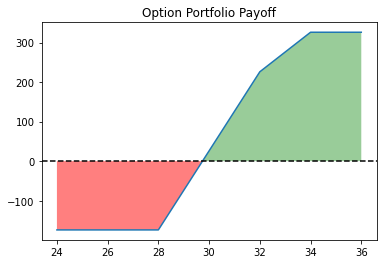

In [4]:
#Types of option strategies
#Iron condor
iron_condor = {1: [95, 0.7, 'put', 'long'],
          2: [100, 2.1, 'put', 'short'],
          3: [105, 2.35, 'call', 'short'],
          4: [110, 0.95, 'call', 'long']}
#Reverse iron_condor
iron_condor_r = {1: [95, 0.7, 'put', 'short'],
          2: [100, 2.1, 'put', 'long'],
          3: [105, 2.35, 'call', 'long'],
          4: [110, 0.95, 'call', 'short']}
#Long straddle
straddle = {1: [100, 2, 'call', 'long'],
            2: [100, 2, 'put', 'long']}
#Short straddle
straddle_short = {1: [100, 2, 'call', 'short'],
            2: [100, 2, 'put', 'short']}
#Bull spread
spread_bull = {1: [28, 3.25, 'call', 'long'],
               2: [33, 1.51, 'call', 'short']}
#Credit spread
spread_credit = {1: [95, 0.5, 'put', 'long'],
               2: [100, 1.5, 'put', 'short']}
#???
questionmark = {1: [26, 4.25, 'call', 'long'],
          2: [28, 3.25, 'call', 'short'],
          3: [31, 3.7, 'put', 'short'],
          4: [33, 6.15, 'put', 'long']}

#INPUT EXAMPLE
#name = {1: [strike, premium, call/put, long/short],
        #2: [strike, premium, call/put, long/short],
        #...
        #N: [strike, premium, call/put, long/short]}

stock_prices = [24, 26, 28, 30, 32, 34, 36]
stock_amount = 0
stock_buy_price = 0
option_portfolio = spread_bull

stock_result = profit_stocks(stock_buy_price, stock_prices, stock_amount)
option_result = profit_option_portfolio(stock_prices, option_portfolio)
option_result

At a cost of -174.0, a portfolio consisting of 0 stocks bought at 0 per share and the following option(s):
long 1 28 call at 3.25
short 1 33 call at 1.51
has the following payoff diagram:


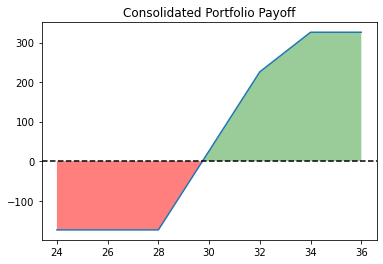

In [5]:
total_cost = total_cost_portfolio(option_portfolio, stock_amount, stock_buy_price)
consolidated_profits = consolidate_portfolio(stock_prices, stock_result, option_result, total_cost)